IMPORT LIBRARY


In [17]:
!pip install Sastrawi

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import warnings
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

UPLOAD DATASET

In [20]:
df = pd.read_excel("https://drive.google.com/uc?export=download&id"+"=1glONYsbbwSvnHzPo-UG2UXAzcTCVcGjw")
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK1
1,2,NaN,Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK2
2,3,NaN,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu mengintegrasikan teknologi mul...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu menganalisis solusi-solusi tek...,PLO9-CLO1
4,5,NaN,Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu mengkombinasikan berbagai pers...,PLO9-CLO2
...,...,...,...,...,...
203,204,NaN,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menjelaskan solusi terbaik yan...,PLO12-CLO3
204,205,NaN,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menerapkan pemrograman paralle...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas pada platform te...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,NaN,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu membedakan berbagai teknik Pen...,PLO10-CLO2


PREPROCESSING


In [21]:
#cek duplikat
df.duplicated().sum()

0

In [22]:
#menghapus spasi
df['CPL'] = df['CPL'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [23]:
# Konfirmasi jumlah CPL unik
unique_cpls = df['CPL'].unique()
print("CPL unik:", len(unique_cpls))

CPL unik: 12


In [24]:
# Replace NaN values in 'Kode_MK' with an empty string
df['Kode_MK'] = df['Kode_MK'].apply(lambda x: x if isinstance(x, str) else '')
df
file_path = 'df.xlsx'
df.to_excel(file_path, index=False)

In [25]:
#remove stopwords cpl
stop_words_indo = set(stopwords.words('indonesian'))
stop_words_eng = set(stopwords.words('english'))
stop_words = stop_words_indo.union(stop_words_eng)
df['CPL'] = df['CPL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mampu mengintegrasikan teknologi mul...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mampu menganalisis solusi-solusi tek...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mampu mengkombinasikan berbagai pers...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa dapat menjelaskan solusi terbaik yan...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa dapat menerapkan pemrograman paralle...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mampu membedakan berbagai teknik Pen...,PLO10-CLO2


In [26]:
#remove stopwords cpmk
stop_words_indo = set(stopwords.words('indonesian'))
stop_words_eng = set(stopwords.words('english'))
stop_words = stop_words_indo.union(stop_words_eng)
df['CPMK'] = df['CPMK'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi-pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi-solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [27]:
#remove punctuation cpl
pattern = r'[^\w\s]'
df['CPL'] = df['CPL'].replace(pattern, ' ', regex=True)
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi-pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi-solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [28]:
#remove punctuation cpmk
pattern = r'[^\w\s]'
df['CPMK'] = df['CPMK'].replace(pattern, ' ', regex=True)
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [29]:
#lowercasing cpl
df['CPL'] = df['CPL'].str.lower()
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [30]:
#lowercasing cpmk
df['CPMK'] = df['CPMK'].str.lower()
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [31]:
def remove_double_and_digits(text):
    # Menghapus huruf double
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    return text

# Terapkan fungsi remove
df["CPL"] = df["CPL"].apply(remove_double_and_digits)
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [32]:
def remove_double_and_digits(text):
    # Menghapus huruf double
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    return text

# Terapkan fungsi remove
df["CPMK"] = df["CPMK"].apply(remove_double_and_digits)
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [33]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 35.3 MB/s eta 0:00:00


In [34]:
import stanza
# Unduh model bahasa Indonesia
stanza.download('id')
nlp = stanza.Pipeline('id')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [35]:
#stemming cpl

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([word.lemma for sentence in doc.sentences for word in sentence.words])


# Melakukan tokenisasi dan stemming untuk setiap kalimat dalam DataFrame
# Terapkan lemmatization pada kolom CLO dan PLO
# Memuat data
X = df['CPL']

# Melakukan tokenisasi dan stemming untuk setiap kalimat dalam DataFrame
df['CPL'] = X.apply(lambda x: lemmatize_text(x))

# Menampilkan DataFrame setelah tokenisasi dan stemming
df


,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu terap metode teknologi kini desain laksa...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu terap metode teknologi kini desain laksa...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu ambil putus konteks selesai masalah berd...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu ambil putus konteks selesai masalah berd...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu identifikasi rumus solusi komputasional ...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu identifikasi rumus solusi komputasional ...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu bangun sistem cerdas platform tertentu p...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [36]:
#stemming cpmk

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([word.lemma for sentence in doc.sentences for word in sentence.words])
# Memuat data
X = df['CPMK']

# Melakukan tokenisasi dan stemming untuk setiap kalimat dalam DataFrame
# Terapkan lemmatization pada kolom CLO dan PLO
# Melakukan tokenisasi dan stemming untuk setiap kalimat dalam DataFrame
df['CPMK'] = X.apply(lambda x: lemmatize_text(x))

# Menampilkan DataFrame setelah tokenisasi dan stemming
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK1
1,2,,mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK2
2,3,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa integrasi teknologi multi platform w...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu ambil putus konteks selesai masalah berd...,mahasiswa analisis solusi solusi teknologi soa...,PLO9-CLO1
4,5,,mampu ambil putus konteks selesai masalah berd...,mahasiswa kombinasi perspektif disiplin ilmu k...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu identifikasi rumus solusi komputasional ...,mahasiswa solusi baik butuh seliesai masalah k...,PLO12-CLO3
204,205,,mampu identifikasi rumus solusi komputasional ...,mahasiswa terap program parallel akselerasi hi...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu bangun sistem cerdas platform tertentu p...,mahasiswa paham konsep kualitas perangkat luna...,PLO10-CLO1
206,207,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa beda teknik uji perangkat lunak iden...,PLO10-CLO2


TF-IDF


In [37]:
# Menggabungkan semua deskripsi CPL unik menjadi satu dokumen (untuk global TF-IDF) dan membuat vectorizer
cpl_docs_tfidf = df.groupby('CPL')['CPL'].first().tolist()
cpmk_docs_tfidf = df.groupby('CPMK')['CPMK'].first().tolist()
docs_tfidf = cpl_docs_tfidf + cpmk_docs_tfidf
tfidf_vectorizer = TfidfVectorizer(
     max_df = 0.6,
     min_df = 10,
     ngram_range=(1,1)
)
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_feature_names

array(['algoritma', 'analisis', 'aplikasi', 'benar', 'butuh', 'dasar',
       'data', 'desain', 'dia', 'hasil', 'hitung', 'identifikasi',
       'implementasi', 'jelas', 'kait', 'kembang', 'konsep', 'lunak',
       'mampu', 'masalah', 'metode', 'paham', 'perangkat', 'program',
       'selesai', 'sesuai', 'sikap', 'sistem', 'solusi', 'teknik',
       'teknologi', 'tepat', 'terap', 'tulis'], dtype=object)

In [38]:
# Konversi tfidf_matrix menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Tampilkan DataFrame yang berisi hasil TF-IDF
tfidf_df
tfidf_df.to_excel('tfidf_vektor.xlsx', index = False )

In [39]:
cosine_similarities = []
for _, row in df.iterrows():
    # Transform teks CPL dan CPMK pada baris ini
    cpl_vector = tfidf_vectorizer.transform([row['CPL']])
    cpmk_vector = tfidf_vectorizer.transform([row['CPMK']])

    # Hitung cosine similarity
    cosine_sim_tfidf = cosine_similarity(cpl_vector, cpmk_vector)[0][0]
    cosine_similarities.append(cosine_sim_tfidf)

# Tambahkan hasil ke kolom baru pada DataFrame
df['hasil_cosine_tfidf'] = cosine_similarities
df

,No,Kode_MK,CPL,CPMK,Ket,hasil_cosine_tfidf
0,1,ABP (CII3H4),mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK1,0.449149
1,2,,mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK2,0.449149
2,3,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa integrasi teknologi multi platform w...,PLO10-CPMK 3,0.000000
3,4,SOSIO (CII3K2),mampu ambil putus konteks selesai masalah berd...,mahasiswa analisis solusi solusi teknologi soa...,PLO9-CLO1,0.072935
4,5,,mampu ambil putus konteks selesai masalah berd...,mahasiswa kombinasi perspektif disiplin ilmu k...,PLO9-CLO2,0.335286
...,...,...,...,...,...,...
203,204,,mampu identifikasi rumus solusi komputasional ...,mahasiswa solusi baik butuh seliesai masalah k...,PLO12-CLO3,0.478314
204,205,,mampu identifikasi rumus solusi komputasional ...,mahasiswa terap program parallel akselerasi hi...,PLO12-CLO4,0.000000
205,206,Verifikasi dan Validasi PL,mampu bangun sistem cerdas platform tertentu p...,mahasiswa paham konsep kualitas perangkat luna...,PLO10-CLO1,0.695482
206,207,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa beda teknik uji perangkat lunak iden...,PLO10-CLO2,0.733656


In [40]:
#describe cosine tfidf
df["hasil_cosine_tfidf"].describe()

,hasil_cosine_tfidf
count,208.000000
mean,0.181407
std,0.234434
min,0.000000
25%,0.000000
50%,0.000000
75%,0.326012
max,1.000000


FASTTEXT


In [46]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=1ff119548fbcb88ced8317b2e4a1a3f9937f4fd234aa2da4c696f1229dc9f6d8
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [47]:
import fasttext
import fasttext.util

In [48]:
# Download model pra-latih untuk bahasa Indonesia
fasttext.util.download_model('id', if_exists='ignore')  # model bahasa Indonesia
model = fasttext.load_model('cc.id.300.bin')  # Load model n-gram bahasa Indonesia

In [49]:
# Fungsi untuk mendapatkan vektor dari teks dengan n-grams
def get_vector(text):
    # Menghitung rata-rata vektor kata untuk teks
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words if word in model]
    if len(vectors) == 0:  # Jika tidak ada kata yang valid
        return np.zeros(model.get_dimension())  # Kembalikan vektor nol dengan dimensi model
    return np.mean(vectors, axis=0)

In [50]:
# Buat list untuk menyimpan hasil cosine similarity
cosine_similarities = []

In [51]:
# Hitung cosine similarity untuk setiap baris
for idx, row in df.iterrows():
    cpl_text = row['CPL'] if pd.notnull(row['CPL']) else ''
    cpmk_text = row['CPMK'] if pd.notnull(row['CPMK']) else ''

    # Dapatkan vektor untuk CPL dan CPMK
    cpl_vector = get_vector(cpl_text)
    cpmk_vector = get_vector(cpmk_text)

    # Hitung cosine similarity
    cosine_sim_ft = cosine_similarity([cpl_vector], [cpmk_vector])[0][0]
    cosine_similarities.append(cosine_sim_ft)

In [52]:
# Tambahkan hasil cosine similarity ke DataFrame sebagai kolom baru
df['hasil_cosine_ft'] = cosine_similarities

# Tampilkan DataFrame hasilnya
df

,No,Kode_MK,CPL,CPMK,Ket,hasil_cosine_tfidf,hasil_cosine_ft
0,1,ABP (CII3H4),mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK1,0.449149,0.670197
1,2,,mampu terap metode teknologi kini desain laksa...,mahasiswa desain implementasi teknologi platfo...,PLO11-CPMK2,0.449149,0.740193
2,3,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa integrasi teknologi multi platform w...,PLO10-CPMK 3,0.000000,0.701064
3,4,SOSIO (CII3K2),mampu ambil putus konteks selesai masalah berd...,mahasiswa analisis solusi solusi teknologi soa...,PLO9-CLO1,0.072935,0.832208
4,5,,mampu ambil putus konteks selesai masalah berd...,mahasiswa kombinasi perspektif disiplin ilmu k...,PLO9-CLO2,0.335286,0.734719
...,...,...,...,...,...,...,...
203,204,,mampu identifikasi rumus solusi komputasional ...,mahasiswa solusi baik butuh seliesai masalah k...,PLO12-CLO3,0.478314,0.854054
204,205,,mampu identifikasi rumus solusi komputasional ...,mahasiswa terap program parallel akselerasi hi...,PLO12-CLO4,0.000000,0.725453
205,206,Verifikasi dan Validasi PL,mampu bangun sistem cerdas platform tertentu p...,mahasiswa paham konsep kualitas perangkat luna...,PLO10-CLO1,0.695482,0.757173
206,207,,mampu bangun sistem cerdas platform tertentu p...,mahasiswa beda teknik uji perangkat lunak iden...,PLO10-CLO2,0.733656,0.662488


In [53]:
#describe cosine fasttext
df["hasil_cosine_ft"].describe()

,hasil_cosine_ft
count,208.000000
mean,0.698076
std,0.112524
min,0.131168
25%,0.653876
50%,0.718737
75%,0.759704
max,0.898284


EVALUASI


In [54]:
# Evaluasi akurasi berdasarkan similarity >= 0.2
# Dianggap akurat jika nilai similarity >= 0.2
is_accurate = df["hasil_cosine_tfidf"].apply(lambda x: 1 if x >= 0.2 else 0)
print(is_accurate)

0      1
1      1
2      0
3      0
4      1
      ..
203    1
204    0
205    1
206    1
207    1
Name: hasil_cosine_tfidf, Length: 208, dtype: int64


In [55]:
# Hitung akurasi total (bukan per CPMK)
total_accuracy_tfidf = is_accurate.values.sum() / is_accurate.size
print("\nTotal Accuracy:", total_accuracy_tfidf)


Total Accuracy: 0.3701923076923077


In [56]:
# Evaluasi akurasi berdasarkan similarity >= 0.5
# Dianggap akurat jika nilai similarity >= 0.5
is_accurate = df["hasil_cosine_ft"].apply(lambda x: 1 if x >= 0.5 else 0)
print(is_accurate)

0      1
1      1
2      1
3      1
4      1
      ..
203    1
204    1
205    1
206    1
207    1
Name: hasil_cosine_ft, Length: 208, dtype: int64


In [57]:
# Hitung akurasi total (bukan per CPMK)
total_accuracy_ft = is_accurate.values.sum() / is_accurate.size
print("\nTotal Accuracy:", total_accuracy_ft)


Total Accuracy: 0.9519230769230769


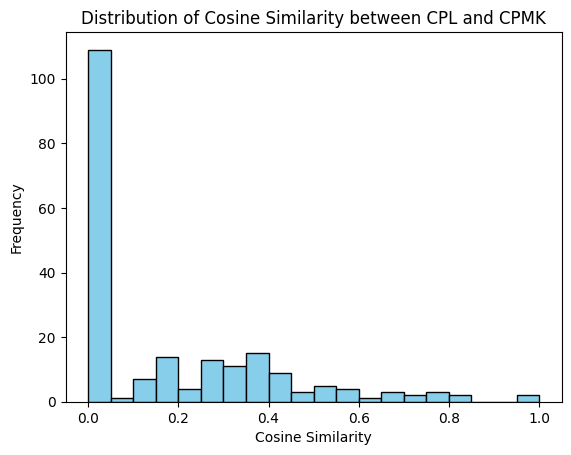

In [58]:
# Visualisasi distribusi cosine similarity tfidf
import matplotlib.pyplot as plt
plt.hist(df['hasil_cosine_tfidf'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity between CPL and CPMK")
plt.show()

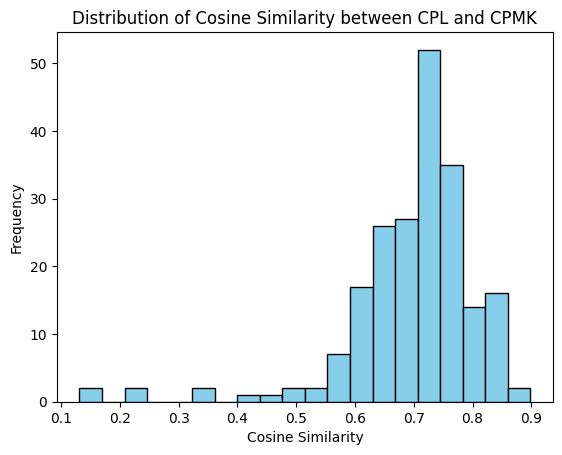

In [59]:
# Visualisasi distribusi cosine similarity fasttext
import matplotlib.pyplot as plt
plt.hist(df['hasil_cosine_ft'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity between CPL and CPMK")
plt.show()

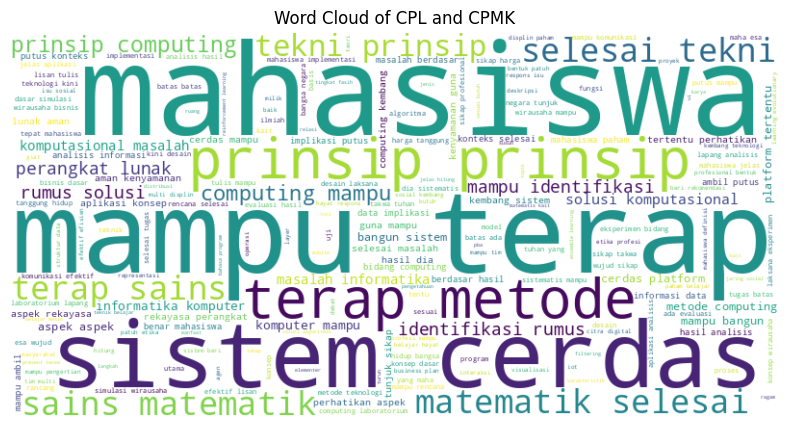

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua CPL dan CPMK menjadi satu teks
text = ' '.join(df['CPL'].tolist() + df['CPMK'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of CPL and CPMK')
plt.show()